# Import 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Install

In [2]:
two_blobs=pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers=pd.read_csv('cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

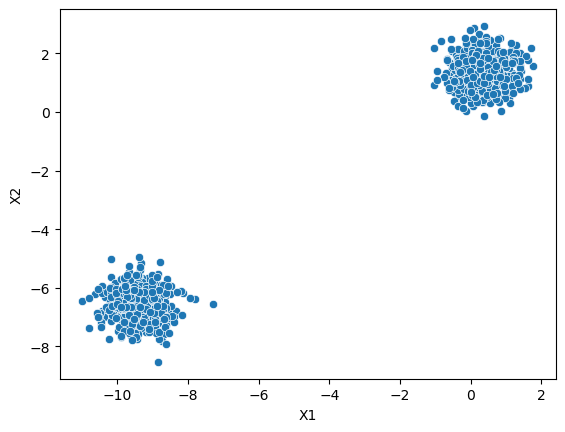

In [3]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

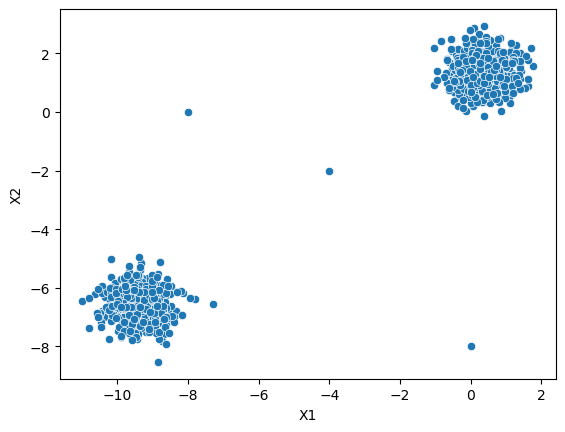

In [4]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

# Label Discovery

In [5]:
def display_catagories(model,data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

# DBSCAN

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan=DBSCAN()

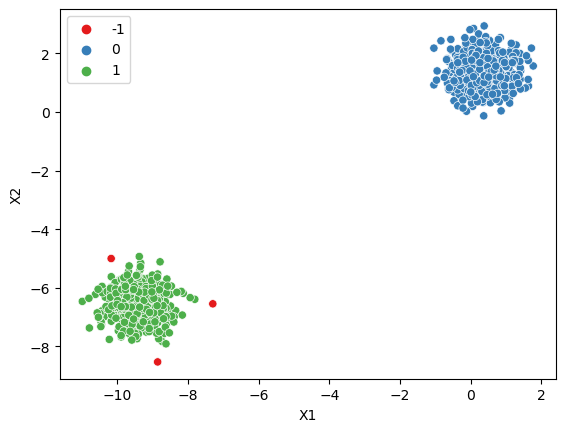

In [8]:
display_catagories(dbscan,two_blobs)

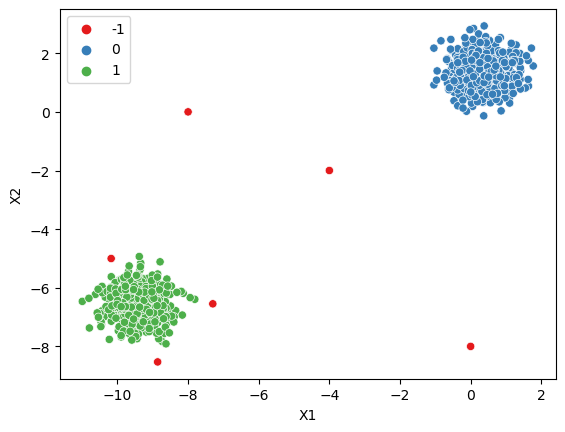

In [9]:
display_catagories(dbscan,two_blobs_outliers)

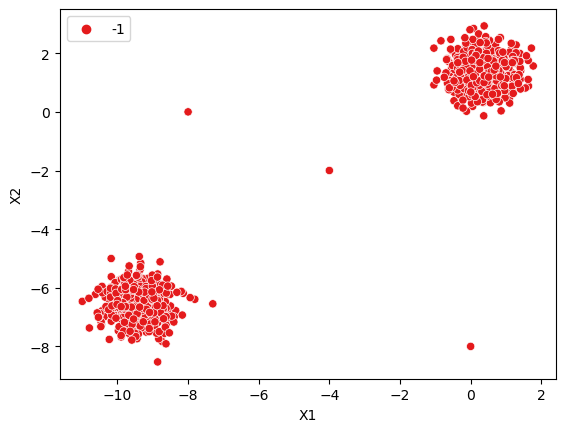

In [10]:
dbscan=DBSCAN(eps=0.001)
display_catagories(dbscan,two_blobs_outliers)

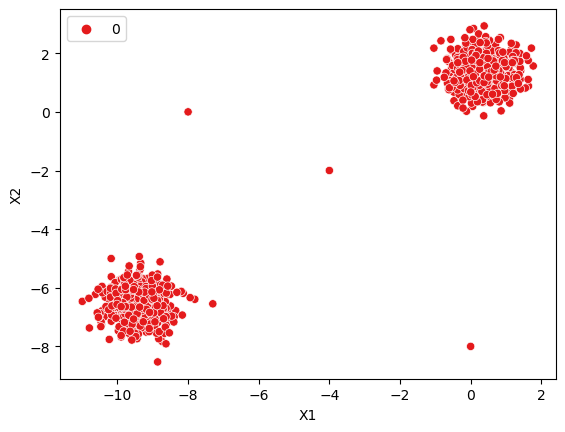

In [11]:
dbscan=DBSCAN(eps=10)
display_catagories(dbscan,two_blobs_outliers)

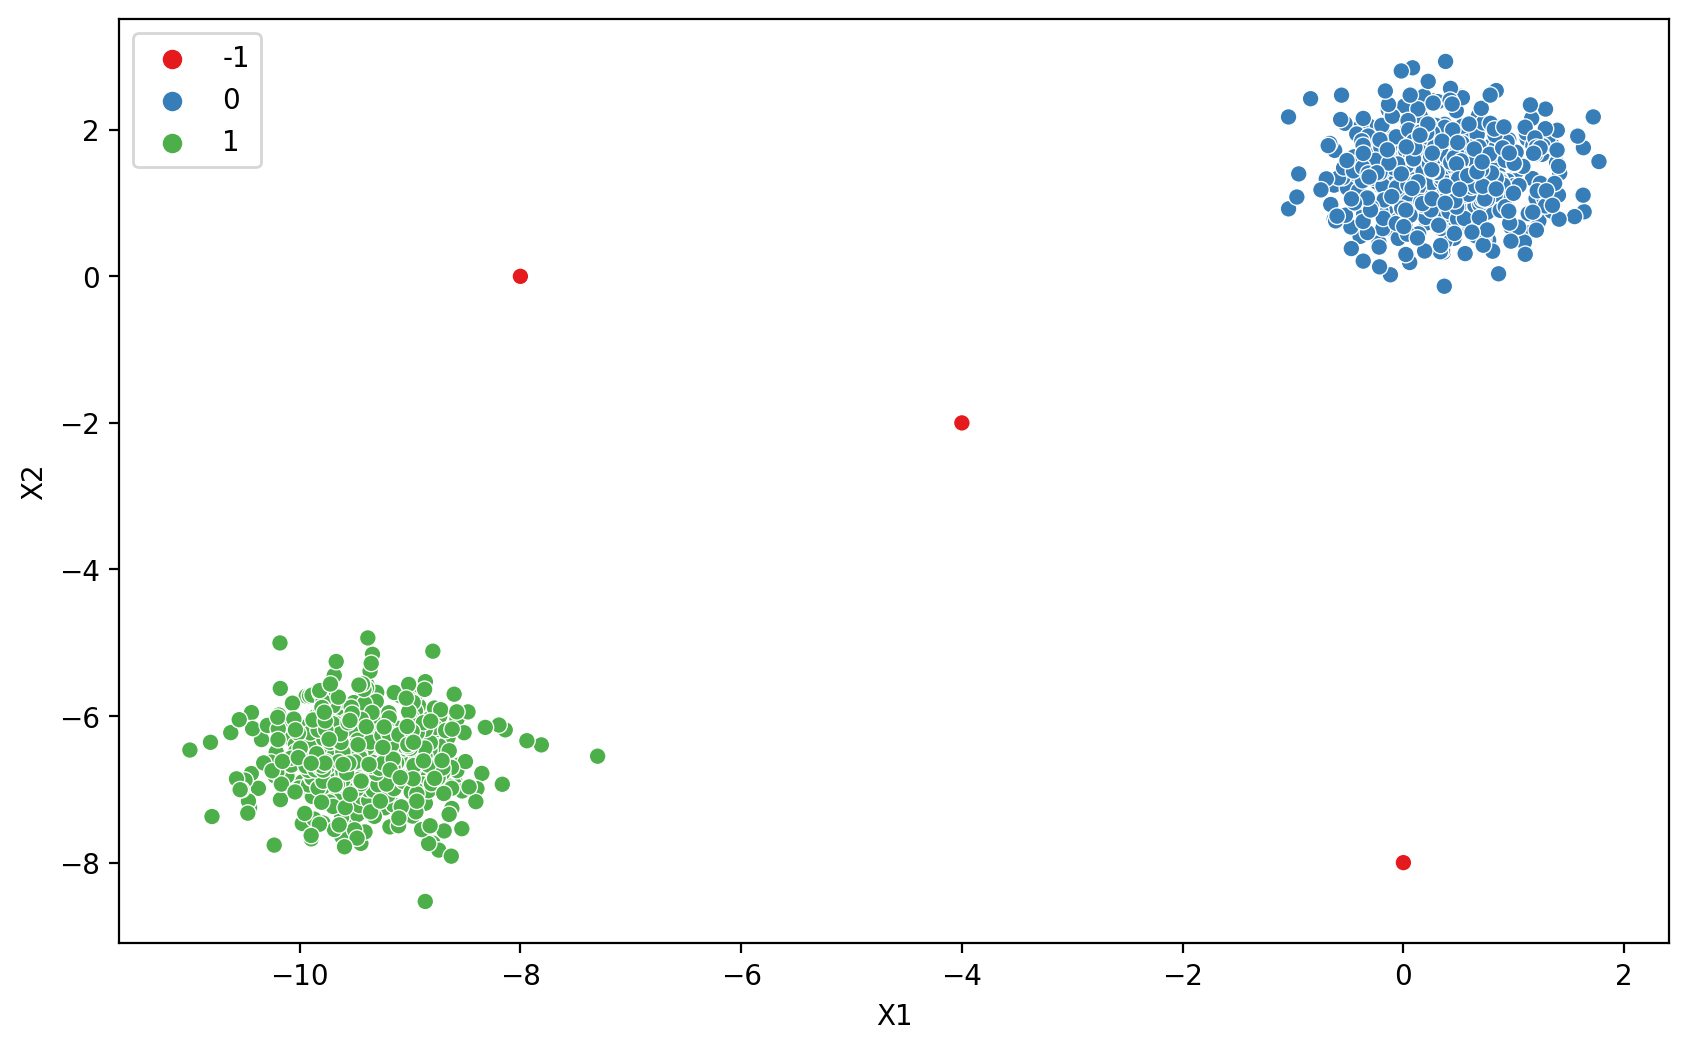

In [12]:
plt.figure(figsize=(10,6),dpi=200)
dbscan=DBSCAN(eps=1)
display_catagories(dbscan,two_blobs_outliers)

In [13]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [14]:
dbscan.labels_==-1

array([False, False, False, ...,  True,  True,  True])

In [15]:
np.sum(dbscan.labels_==-1)

3

In [16]:
100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)

0.29910269192422734

# Creating reasonable Epsilon Values

In [17]:
outlier_percent=[]
number_of_outliers=[]
for eps in np.linspace(0.001,10,100):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
    perc_outliers=100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

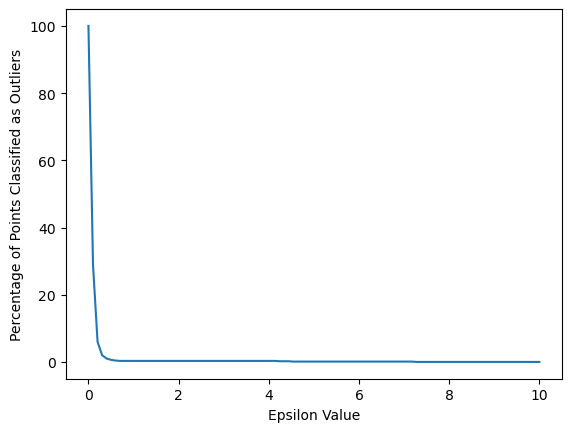

In [18]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')

(0.0, 1.0)

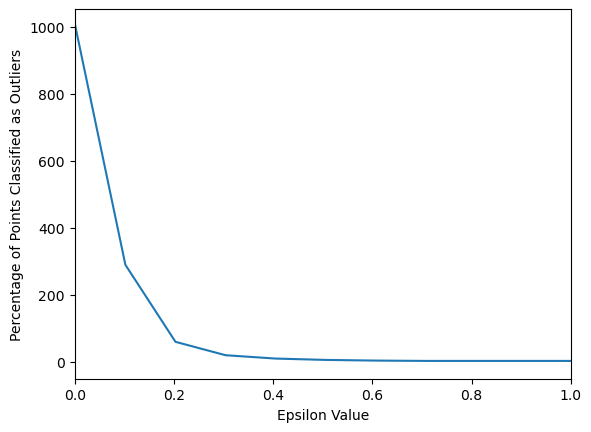

In [19]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')
plt.xlim(0,1)

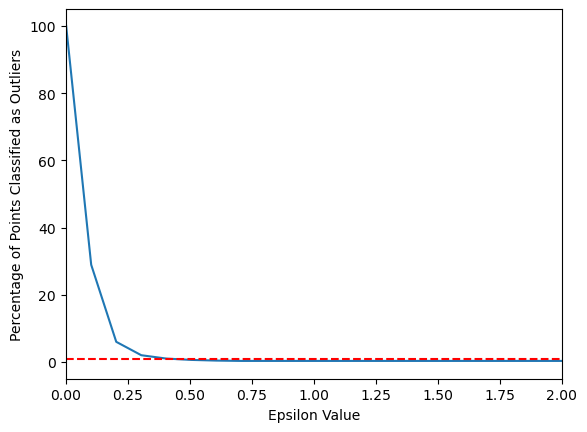

In [20]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')
plt.xlim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

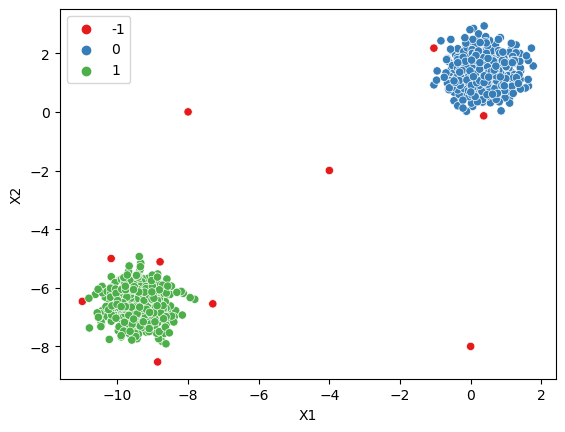

In [21]:
dbscan=DBSCAN(eps=0.4)
display_catagories(dbscan,two_blobs_outliers)

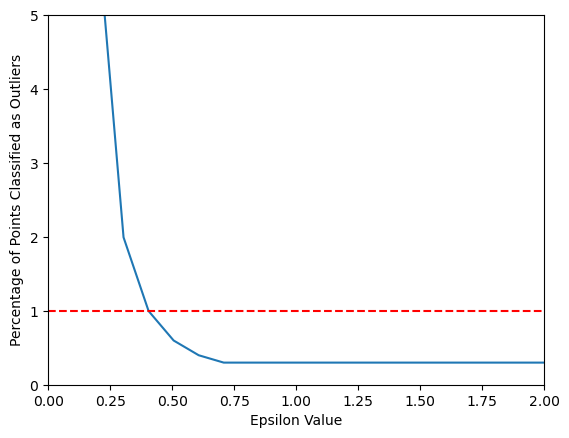

In [22]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

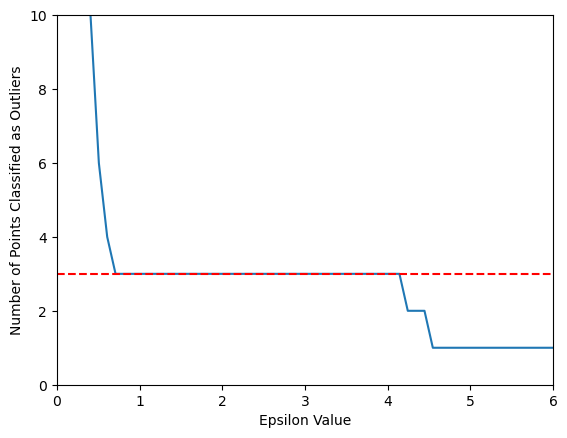

In [23]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel('Number of Points Classified as Outliers')
plt.xlabel('Epsilon Value')
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

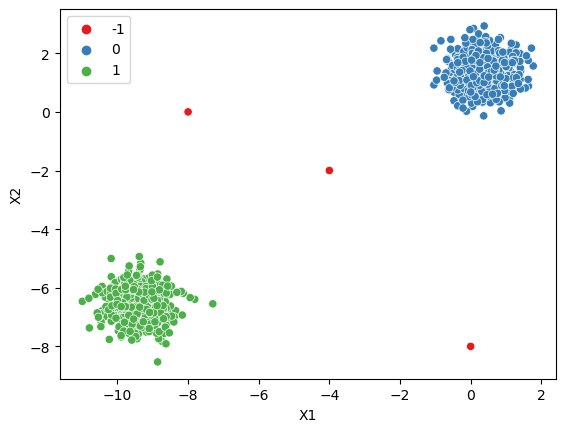

In [24]:
dbscan=DBSCAN(eps=0.75)
display_catagories(dbscan,two_blobs_outliers)

# Minimum Samples

In [25]:
outlier_percent =[]
for n in np.arange(1,100):
    dbscan=DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    perc_outliers=100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

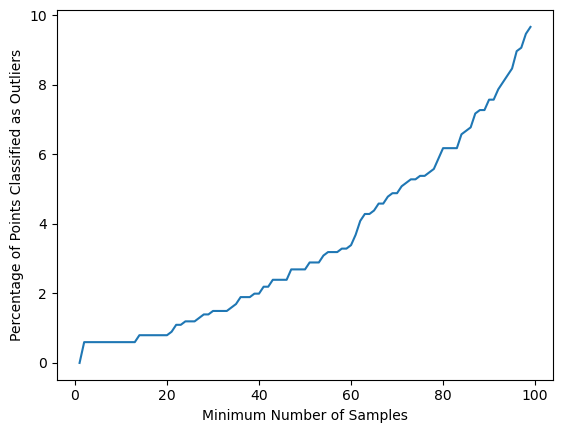

In [26]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Minimum Number of Samples')

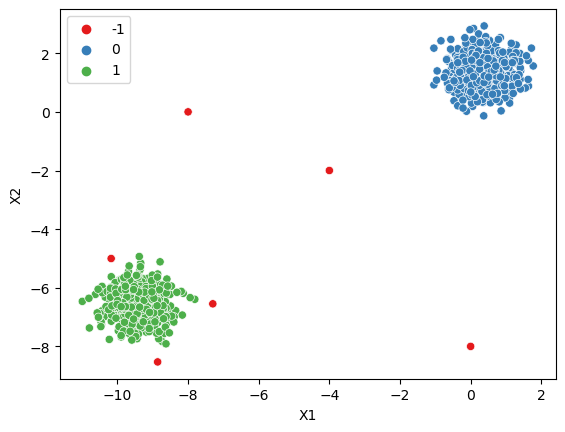

In [27]:
num_dim=two_blobs_outliers.shape[1]
dbscan=DBSCAN(min_samples=2*num_dim)
display_catagories(dbscan,two_blobs_outliers)

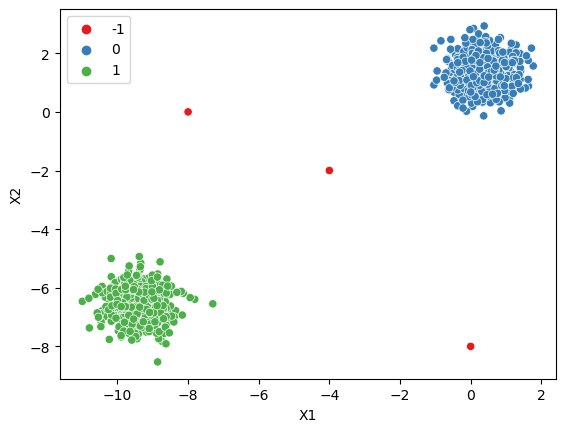

In [29]:
num_dim=two_blobs_outliers.shape[1]
dbscan=DBSCAN(eps=0.75,min_samples=2*num_dim)
display_catagories(dbscan,two_blobs_outliers)

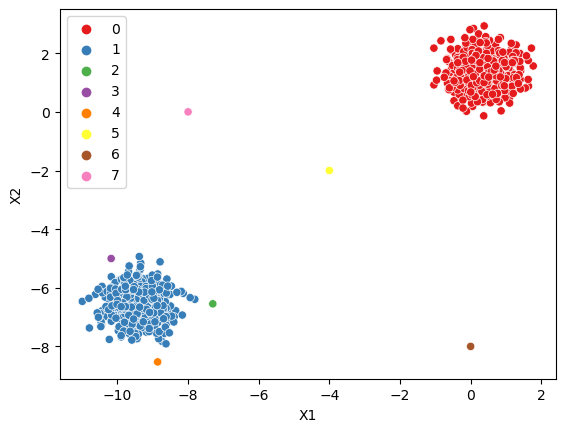

In [31]:
dbscan=DBSCAN(min_samples=1)
display_catagories(dbscan,two_blobs_outliers)

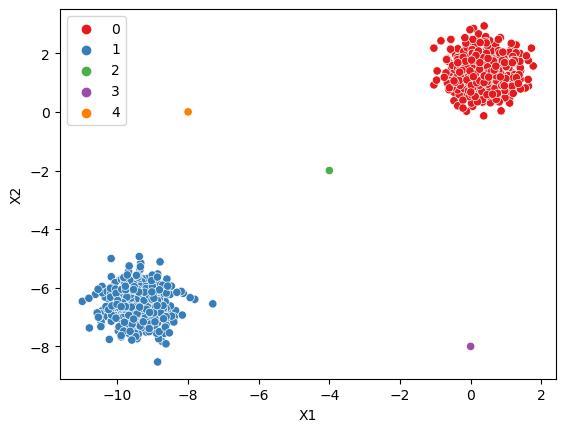

In [32]:
dbscan=DBSCAN(eps=0.75,min_samples=1)
display_catagories(dbscan,two_blobs_outliers)